**Project** **Type** : EDA

Akshatha R V \
24PG00016

Flight delay refers to a situation where a scheduled flight does not depart or arrive on time. It is a common challenge in the aviation industry and can have widespread impacts on passengers, airlines, airports, and air traffic management systems.
A flight is considered delayed if it departs or arrives later than its scheduled time. Delays are usually categorized by:

1. Departure Delay: Late takeoff from the origin airport.

2. Arrival Delay: Late landing at the destination airport.

3. Gate Delay: Time difference between scheduled and actual gate departure/arrival.

**About Dataset:**\
Dataset has been taken from kaggle. Those events were collected and authenticated by US airline carriers responsible for almost 1% of all domestic scheduled passenger revenues. The office of airline information, bureau of transportation statistics (BTS) collected and summarised the complete details.
Dataset Link: https://www.kaggle.com/datasets/mrferozi/flight-delays

**Importing all necessary modules**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go

**Importing** Dataset and getting **overview** of dataset.

In [ ]:
df = pd.read_csv('/content/fl_samp.csv')

In [ ]:
df.head()

,Year,Month,Day,DayOfWeek,Flight_Date,UniqueCarrier,Origin_Airport,Scheduled_Departure,Departure_Time,Dep_Delay,...,Distance,DistanceGroup,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3
0,2017,5,15,1,15/05/2017,DL,DFW,1605,1600,-5,...,731,3,0,0,0,0,0,1200-1800,1400-1600,1500-1600\r
1,2017,5,15,1,15/05/2017,DL,MSP,700,656,-4,...,1276,6,0,0,0,0,0,0600-1200,0600-0800,0600-0700\r
2,2017,5,15,1,15/05/2017,DL,ATL,2147,2147,0,...,350,2,0,0,0,0,0,1800-2359,2000-2200,2100-2200\r
3,2017,5,15,1,15/05/2017,DL,MSP,1756,1757,1,...,1276,6,0,0,0,0,0,1200-1800,1600-1800,1700-1800\r
4,2017,5,15,1,15/05/2017,DL,DEN,600,646,46,...,1199,5,26,0,0,0,0,0600-1200,0600-0800,0600-0700\r


In [ ]:
df.sample(3)

,Year,Month,Day,DayOfWeek,Flight_Date,UniqueCarrier,Origin_Airport,Scheduled_Departure,Departure_Time,Dep_Delay,...,Distance,DistanceGroup,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3
3021,2017,5,25,4,25/05/2017,DL,MCO,750,754,4,...,404,2,0,0,0,0,0,0600-1200,0600-0800,0700-0800\r
1218,2017,5,24,3,24/05/2017,DL,MSP,905,901,-4,...,991,4,0,0,0,0,0,0600-1200,0800-1000,0900-1000\r
365,2017,5,15,1,15/05/2017,DL,DTW,2041,2035,-6,...,500,3,0,0,0,0,0,1800-2359,2000-2200,2000-2100\r


In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'Flight_Date', 'UniqueCarrier',
       'Origin_Airport', 'Scheduled_Departure', 'Departure_Time', 'Dep_Delay',
       'DepDel15', 'Scheduled_Arrival', 'Arrival_Delay', 'Arr_Del_morethan15',
       'Distance', 'DistanceGroup', 'Carrier_Delay', 'WeatherDelay',
       'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay', 'DEPTIME_GROUP1',
       'DEPTIME_GROUP2', 'DEPTIME_GROUP3'],
      dtype='object')

This dataset Has columns as follows:
* **Year:** Integer Year of the flight
* **Month:** Integer Month of flight
* **Day:** Integer Day of the flight
* **DayOfWeek:** Integer Day of the flight
* **Flight_Date:** text Date of the flight
* **UniqueCarrier:** text (This code assigns to each individual airline for analysis)
* **Origin_Airport:** text Origin Airport
* **Scheduled_Departure:** Integer Scheduled Departure
* **Departure_Time:** Integer Departure Time
* **Dep_Delay:** Integer Departure Delay less than 15 minutes
* **DepDel15:** Integer Departure Delay more than 15 minutes
* **Arrival_Delay:** Integer Flight Arrival Delay
* **Arr_Del_morethan15:** Integer Arrival Delay more than 15 minutes
* **Distance:** Integer Flight Distance
* **DistanceGroup:** Integer Flight Distance Group
* **Carrier_Delay:** Integer Carrier Delay
* **WeatherDelay:** Integer Delay due to Weather
* **NAS_Delay:** Integer National Air System Delay, in Minutes
* **Security_Delay:** Integer Security Delay, in Minutes
* **Late_Aircraft_Delay:** Integer Late Aircraft Delay, in Minutes
* **DEPTIME_GROUP1:** text Departure Time Group 1
* **DEPTIME_GROUP2:** tex t Departure Time Group 2
* **DEPTIME_GROUP3:** text Departure Time Group 3

**Checking for null values in dataset**

In [ ]:
df.isnull().sum()

,0
Year,0
Month,0
Day,0
DayOfWeek,0
Flight_Date,0
UniqueCarrier,0
Origin_Airport,0
Scheduled_Departure,0
Departure_Time,0
Dep_Delay,0


Dataset has been checked for null values and there is no any null values in the dataset.

In [ ]:
# Getting datatypes of each feature
df.dtypes

,0
Year,int64
Month,int64
Day,int64
DayOfWeek,int64
Flight_Date,object
UniqueCarrier,object
Origin_Airport,object
Scheduled_Departure,int64
Departure_Time,int64
Dep_Delay,int64


In [ ]:
# Function to convert integer time to HH:MM format
def convert_to_time(t):
    t = int(t)
    hour = t // 100
    minute = t % 100
    return f"{hour:02d}:{minute:02d}"

# Replace values in original columns
df['Scheduled_Departure'] = df['Scheduled_Departure'].apply(convert_to_time)
df['Departure_Time'] = df['Departure_Time'].apply(convert_to_time)
df['Scheduled_Arrival'] = df['Scheduled_Arrival'].apply(convert_to_time)

print(df)

      Year  Month  Day  DayOfWeek Flight_Date UniqueCarrier Origin_Airport  \
0     2017      5   15          1  15/05/2017            DL            DFW   
1     2017      5   15          1  15/05/2017            DL            MSP   
2     2017      5   15          1  15/05/2017            DL            ATL   
3     2017      5   15          1  15/05/2017            DL            MSP   
4     2017      5   15          1  15/05/2017            DL            DEN   
...    ...    ...  ...        ...         ...           ...            ...   
4995  2017      5   27          6  27/05/2017            DL            JFK   
4996  2017      5   27          6  27/05/2017            DL            MCO   
4997  2017      5   27          6  27/05/2017            DL            PHX   
4998  2017      5   27          6  27/05/2017            DL            DTW   
4999  2017      5   27          6  27/05/2017            DL            LAX   

     Scheduled_Departure Departure_Time  Dep_Delay  ...  Distan

Format of Scheduled_Departure, Departure_Time and Scheduled_Arrival time from HHMM to  HH:MM has been converted

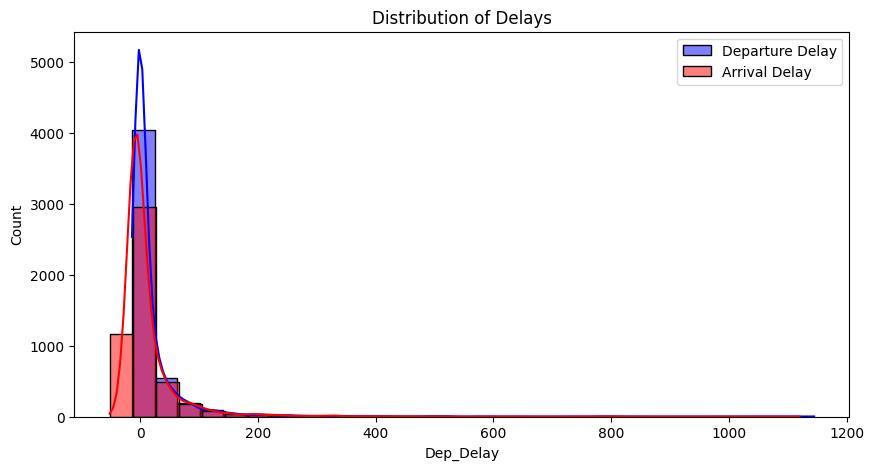

In [ ]:
# Histogram of delays
plt.figure(figsize=(10, 5))
sns.histplot(df['Dep_Delay'], bins=30, kde=True, color='blue', label='Departure Delay')
sns.histplot(df['Arrival_Delay'], bins=30, kde=True, color='red', label='Arrival Delay')
plt.legend()
plt.title('Distribution of Delays')
plt.show()

Above graph represents the how Departure Delay and Arrival Delay varies. It shows that more delay is happening while departuring than flight arrival delay. And Delay is happening upto 1200 minutes.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Example dataset (use your df)
# df = pd.read_csv('your_data.csv')

# Create histogram for Departure Delay
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df['Dep_Delay'],
    nbinsx=30,
    name='Departure Delay',
    marker_color='blue',
    opacity=0.6,
    hovertemplate='Departure Delay: %{x}<br>Count: %{y}<extra></extra>'
))

# Create histogram for Arrival Delay
fig.add_trace(go.Histogram(
    x=df['Arrival_Delay'],
    nbinsx=30,
    name='Arrival Delay',
    marker_color='red',
    opacity=0.6,
    hovertemplate='Arrival Delay: %{x}<br>Count: %{y}<extra></extra>'
))

# Overlay both histograms
fig.update_layout(
    barmode='overlay',
    title='Distribution of Delays',
    xaxis_title='Delay (minutes)',
    yaxis_title='Count',
    legend=dict(title='Delay Type'),
    template='plotly_white'
)

fig.show()


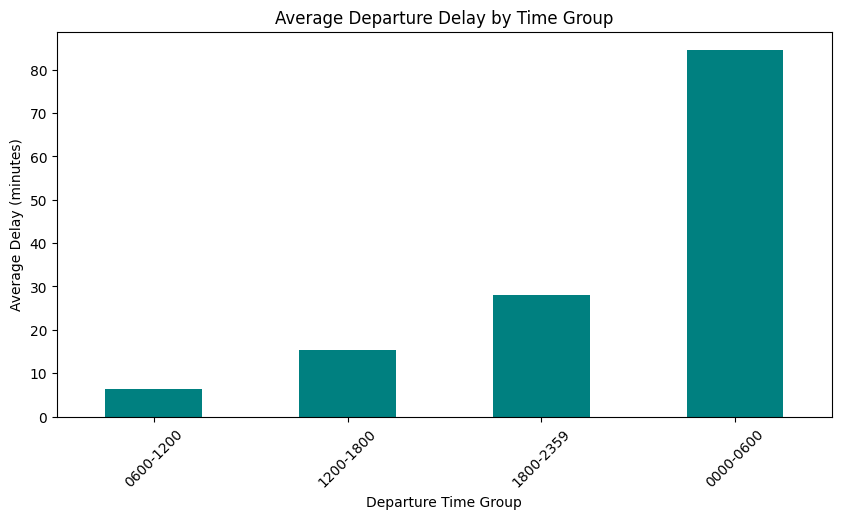

In [ ]:
grouped = df.groupby('DEPTIME_GROUP1')['Dep_Delay'].mean().sort_values()

plt.figure(figsize=(10, 5))
grouped.plot(kind='bar', color='teal')
plt.title("Average Departure Delay by Time Group")
plt.xlabel("Departure Time Group")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

Above graph represents the **Average departure delay** with **DEPTIME_GROUP1** and more delay is happening between 12:00AM to 06:00AM.

In [ ]:
import plotly.express as px

# Prepare the data
grouped = df.groupby('DEPTIME_GROUP1')['Dep_Delay'].mean().sort_values().reset_index()

# Create interactive bar plot with tooltip
fig = px.bar(
    grouped,
    x='DEPTIME_GROUP1',
    y='Dep_Delay',
    title="Average Departure Delay by Time Group",
    labels={'DEPTIME_GROUP1': 'Departure Time Group', 'Dep_Delay': 'Average Delay (minutes)'},
    color_discrete_sequence=['teal'],
    hover_data={'Dep_Delay': ':.2f'}  # Tooltip shows average delay rounded to 2 decimals
)

# Update layout for better appearance
fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig.show()


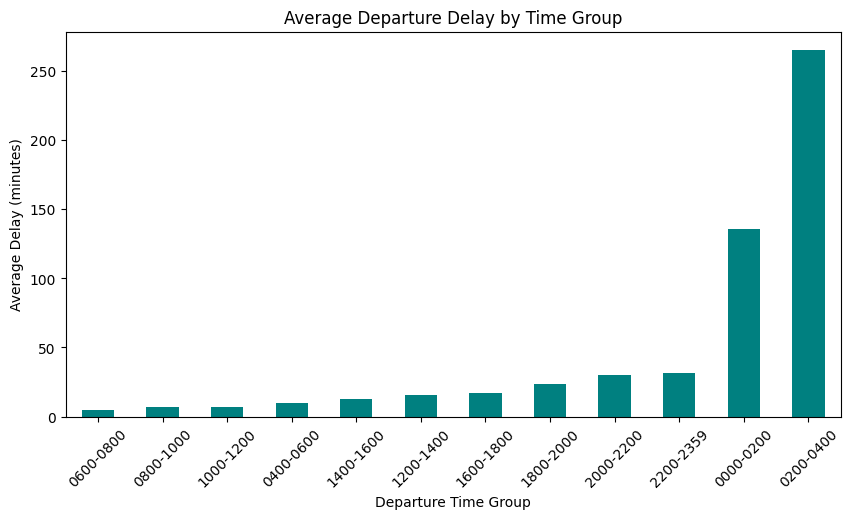

In [ ]:
grouped = df.groupby('DEPTIME_GROUP2')['Dep_Delay'].mean().sort_values()

plt.figure(figsize=(10, 5))
grouped.plot(kind='bar', color='teal')
plt.title("Average Departure Delay by Time Group")
plt.xlabel("Departure Time Group")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

Above graph represents the **Average departure delay** with **DEPTIME_GROUP2** and more delay is happening between 02:00AM to 04:00AM.

In [ ]:
import plotly.express as px

# Prepare the grouped data
grouped = df.groupby('DEPTIME_GROUP2')['Dep_Delay'].mean().sort_values().reset_index()

# Create interactive bar plot with tooltips
fig = px.bar(
    grouped,
    x='DEPTIME_GROUP2',
    y='Dep_Delay',
    title="Average Departure Delay by Time Group",
    labels={
        'DEPTIME_GROUP2': 'Departure Time Group',
        'Dep_Delay': 'Average Delay (minutes)'
    },
    color_discrete_sequence=['teal'],
    hover_data={'Dep_Delay': ':.2f'}  # Format tooltip to show 2 decimal places
)

# Update layout for better appearance
fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Show the plot
fig.show()

) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


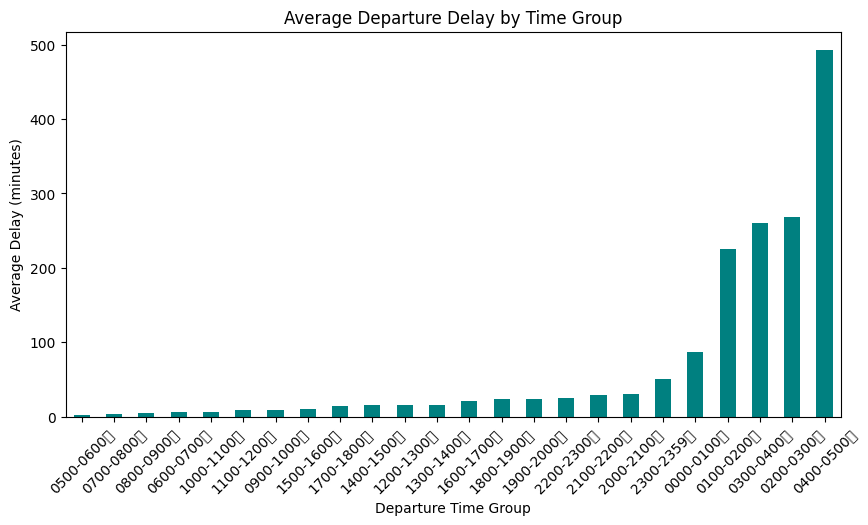

In [ ]:
grouped = df.groupby('DEPTIME_GROUP3')['Dep_Delay'].mean().sort_values()

plt.figure(figsize=(10, 5))
grouped.plot(kind='bar', color='teal')
plt.title("Average Departure Delay by Time Group")
plt.xlabel("Departure Time Group")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

Above graph represents the **Average departure delay** with **DEPTIME_GROUP3** and more delay is happening between 04:00AM to 05:00AM.

In [ ]:
import plotly.express as px

# Prepare the data
grouped = df.groupby('DEPTIME_GROUP3')['Dep_Delay'].mean().sort_values().reset_index()

# Create an interactive bar plot
fig = px.bar(
    grouped,
    x='DEPTIME_GROUP3',
    y='Dep_Delay',
    title="Average Departure Delay by Time Group",
    labels={
        'DEPTIME_GROUP3': 'Departure Time Group',
        'Dep_Delay': 'Average Delay (minutes)'
    },
    color_discrete_sequence=['teal'],
    hover_data={'Dep_Delay': ':.2f'}  # Tooltip: rounded to 2 decimal places
)

# Improve layout
fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Show the interactive plot
fig.show()

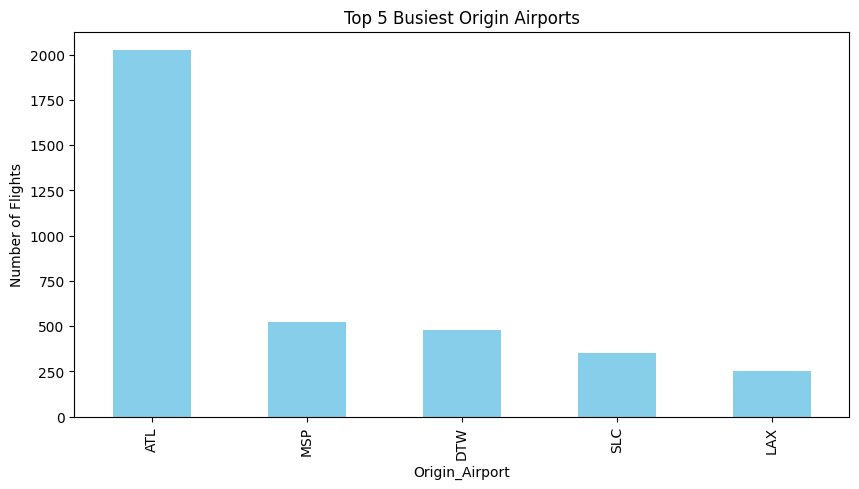

In [ ]:
plt.figure(figsize=(10, 5))
df['Origin_Airport'].value_counts().head(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 Busiest Origin Airports')
plt.ylabel('Number of Flights')
plt.show()

Above graph represents which airport is Busiest Origin Airport. ATL is always the busiest airport.

In [ ]:
import plotly.express as px

# Prepare data
origin_counts = df['Origin_Airport'].value_counts().head(5).reset_index()
origin_counts.columns = ['Origin_Airport', 'Number_of_Flights']

# Create interactive bar plot
fig = px.bar(
    origin_counts,
    x='Origin_Airport',
    y='Number_of_Flights',
    title='Top 5 Busiest Origin Airports',
    labels={'Origin_Airport': 'Origin Airport', 'Number_of_Flights': 'Number of Flights'},
    color_discrete_sequence=['skyblue'],
    hover_data={'Number_of_Flights': True}
)

# Update layout
fig.update_layout(
    template='plotly_white'
)

# Show plot
fig.show()

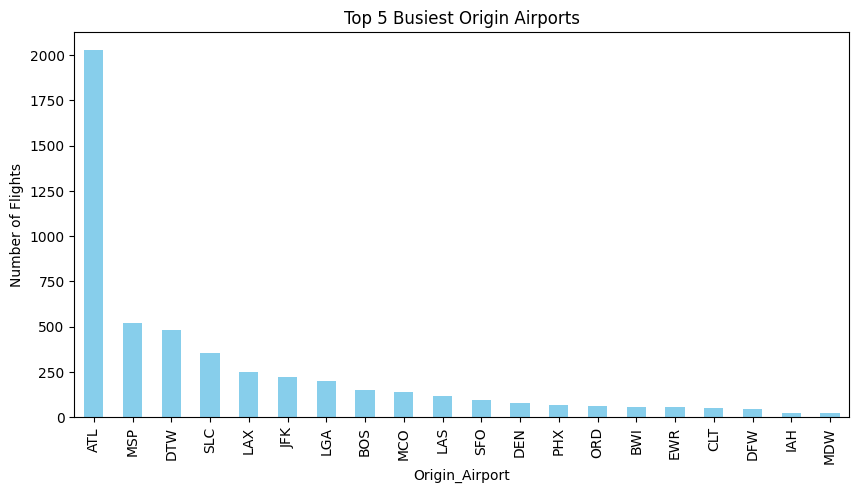

In [ ]:
plt.figure(figsize=(10, 5))
df['Origin_Airport'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Top 5 Busiest Origin Airports')
plt.ylabel('Number of Flights')
plt.show()

Above graph represents which airport is Origin Airport in decresing order.

In [ ]:
import plotly.express as px

# Prepare data
origin_counts = df['Origin_Airport'].value_counts().head(5).reset_index()
origin_counts.columns = ['Origin_Airport', 'Number_of_Flights']

# Create interactive bar plot
fig = px.bar(
    origin_counts,
    x='Origin_Airport',
    y='Number_of_Flights',
    title='Top 5 Busiest Origin Airports',
    labels={
        'Origin_Airport': 'Origin Airport',
        'Number_of_Flights': 'Number of Flights'
    },
    color_discrete_sequence=['skyblue'],
    hover_data={'Number_of_Flights': True}
)

# Update layout
fig.update_layout(
    template='plotly_white'
)

# Show plot
fig.show()

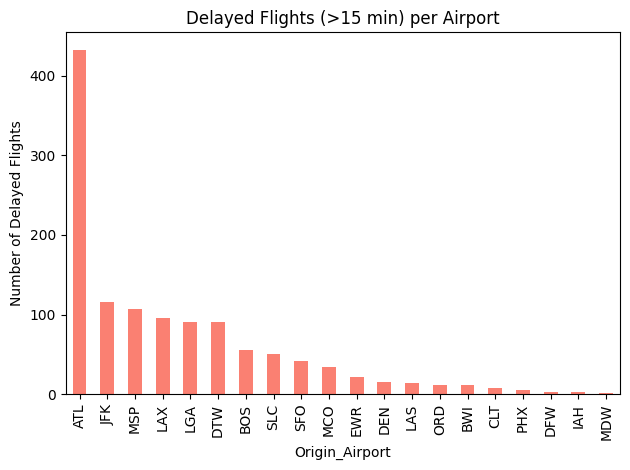

In [ ]:
import matplotlib.pyplot as plt

# Count delayed flights (>15 minutes) by airport
delay_count = df[df['Arr_Del_morethan15'] == 1].groupby('Origin_Airport').size()

# Sort in descending order
delay_count_sorted = delay_count.sort_values(ascending=False)

# Plot
delay_count_sorted.plot(kind='bar', color='salmon', title='Delayed Flights (>15 min) per Airport')
plt.ylabel("Number of Delayed Flights")
plt.tight_layout()  # Optional: improves layout
plt.show()

Above graph represents the Number of delayed flights with it's Origin_Airport and ATL has more number of delayed flights which is upto 430.
Even though JFK is in 6th in it's count of flights, number of delayed flights is more.

In [ ]:
import plotly.express as px

# Prepare the data
delay_count = df[df['Arr_Del_morethan15'] == 1].groupby('Origin_Airport').size().reset_index(name='Number_of_Delayed_Flights')

# Sort in descending order
delay_count_sorted = delay_count.sort_values(by='Number_of_Delayed_Flights', ascending=False)

# Create interactive bar plot
fig = px.bar(
    delay_count_sorted,
    x='Origin_Airport',
    y='Number_of_Delayed_Flights',
    title='Delayed Flights (>15 min) per Airport',
    labels={
        'Origin_Airport': 'Origin Airport',
        'Number_of_Delayed_Flights': 'Number of Delayed Flights'
    },
    color_discrete_sequence=['salmon'],
    hover_data={'Number_of_Delayed_Flights': True}
)

# Update layout
fig.update_layout(
    template='plotly_white',
    xaxis_tickangle=-45
)

# Show plot
fig.show()

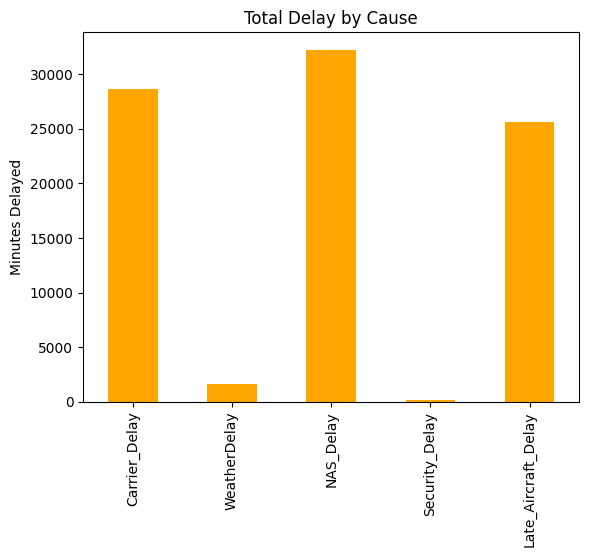

In [ ]:
causes = ['Carrier_Delay', 'WeatherDelay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']
df[causes].sum().plot(kind='bar', color='orange')
plt.title('Total Delay by Cause')
plt.ylabel('Minutes Delayed')
plt.show()

Above graph represents the comprison between different reasons for delay. NAS_Delay is the major reason for flight delay and Carrier_Delay and Late_Aircraft_Delay are also major reason for flight delay.

In [ ]:
import plotly.express as px
import pandas as pd

# Prepare the data
causes = ['Carrier_Delay', 'WeatherDelay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']
delay_by_cause = df[causes].sum().reset_index()
delay_by_cause.columns = ['Cause', 'Total_Minutes_Delayed']

# Create interactive bar plot
fig = px.bar(
    delay_by_cause,
    x='Cause',
    y='Total_Minutes_Delayed',
    title='Total Delay by Cause',
    labels={
        'Cause': 'Cause of Delay',
        'Total_Minutes_Delayed': 'Minutes Delayed'
    },
    color_discrete_sequence=['orange'],
    hover_data={'Total_Minutes_Delayed': True}
)

# Update layout for better readability
fig.update_layout(
    template='plotly_white'
)

# Show the plot
fig.show()

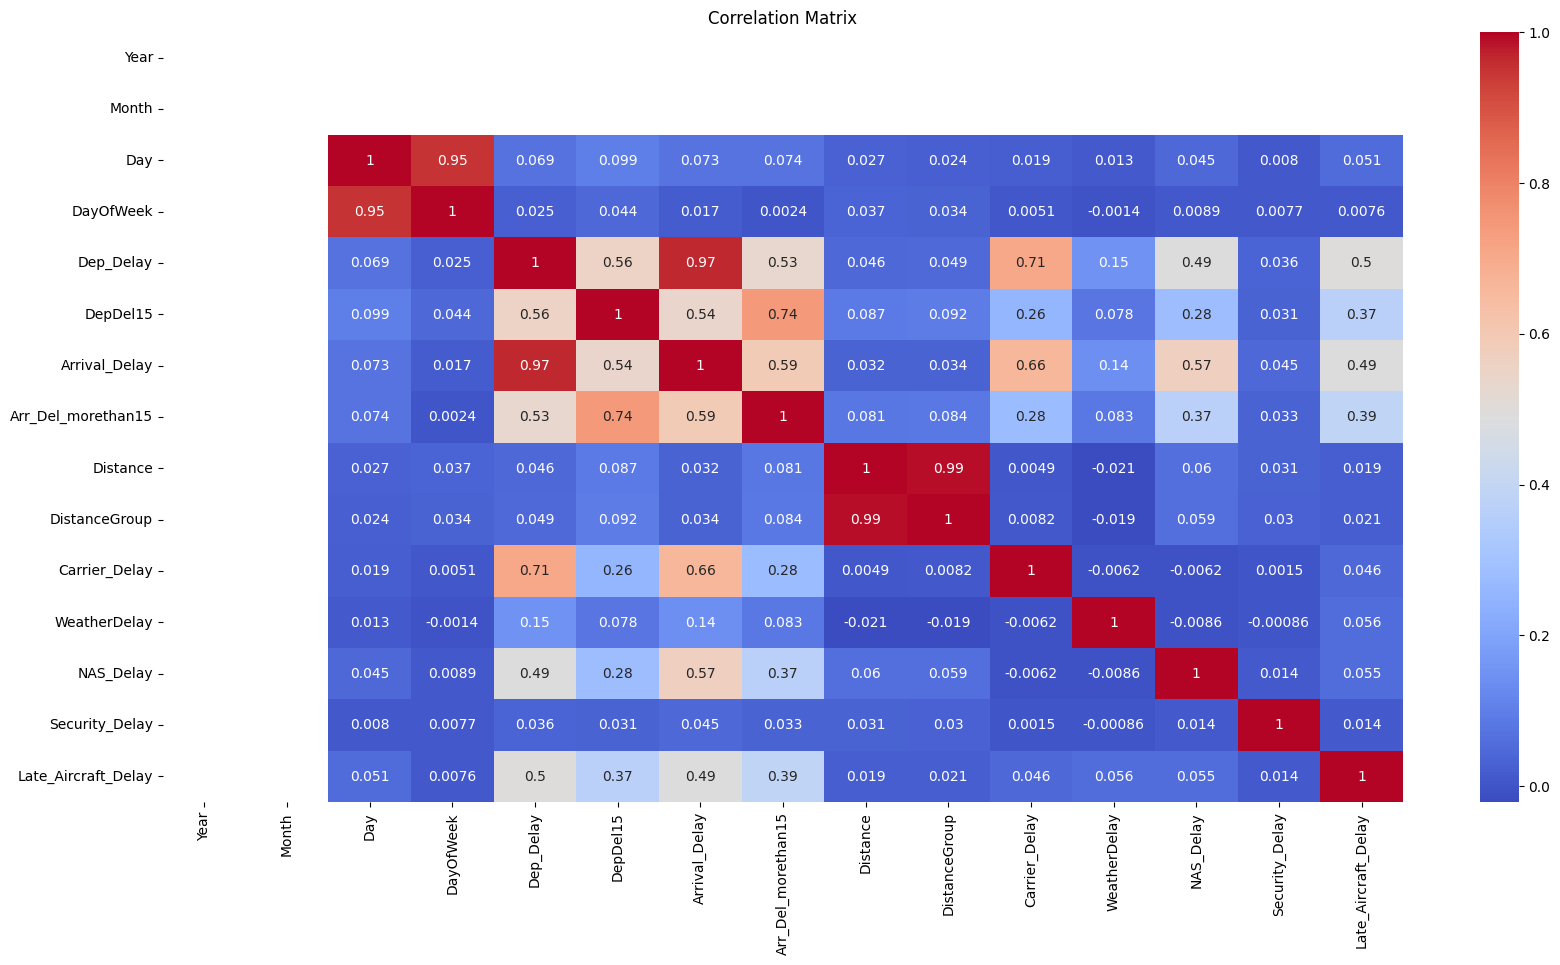

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Above graph represents the correlation between each features. Correlation between Distance and Distance_Group has more correlation.

In [ ]:
print("Unique values in 'UniqueCarrier':")
print(df['UniqueCarrier'].unique())

print("\nUnique values in 'Origin_Airport':")
print(df['Origin_Airport'].unique())

Unique values in 'UniqueCarrier':
['DL']

Unique values in 'Origin_Airport':
['DFW' 'MSP' 'ATL' 'DEN' 'BOS' 'DTW' 'MCO' 'LAS' 'PHX' 'LGA' 'LAX' 'SLC'
 'SFO' 'CLT' 'ORD' 'BWI' 'MDW' 'EWR' 'IAH' 'JFK']


Above are the Unique values of Origin_Airport.


**Origin Airports are:**\
**DFW:**	Dallas/Fort Worth International Airport\
**MSP:**	Minneapolis-Saint Paul International Airport\
**ATL:**	Hartsfield-Jackson Atlanta International Airport\
**DEN:**	Denver International Airport\
**BOS:**	Boston Logan International Airport\
**DTW:**	Detroit Metropolitan Wayne County Airport\
**MCO:**	Orlando International Airport\
**LAS:**	Harry Reid International Airport (formerly McCarran)\
**PHX:**	Phoenix Sky Harbor International Airport\
**LGA:**	LaGuardia Airport\
**LAX:**	Los Angeles International Airport\
**SLC:**	Salt Lake City International Airport\
**SFO:**	San Francisco International Airport\
**CLT:**	Charlotte Douglas International Airport\
**ORD:**	O'Hare International Airport\
**BWI:**	Baltimore/Washington International Thurgood Marshall Airport\
**MDW:**	Midway International Airport\
**EWR:**	Newark Liberty International Airport\
**IAH:**	George Bush Intercontinental Airport\
**JFK:**	John F. Kennedy International Airport


In [ ]:
print(df['UniqueCarrier'].unique())

['DL']


In [ ]:
df = df.drop(columns=['UniqueCarrier'])

In [ ]:
print(df['DayOfWeek'].unique())

[1 3 4 5 6]


In [ ]:
print(df['Year'].unique())

[2017]


In [ ]:
df = df.drop(columns=['Year'])

In [ ]:
print(df['Month'].unique())

[5]


In [ ]:
df = df.drop(columns=['Month'])

Checking the unique values of Month, Year and UniqueCarrier. All features have one unique value so drop all the columns.

In [ ]:
# Remove extra characters like carriage return
df['DEPTIME_GROUP3'] = df['DEPTIME_GROUP3'].str.strip()
df.head()

,Month,Day,DayOfWeek,Flight_Date,Origin_Airport,Scheduled_Departure,Departure_Time,Dep_Delay,DepDel15,Scheduled_Arrival,...,Distance,DistanceGroup,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3
0,5,15,1,15/05/2017,DFW,1605,1600,-5,0,1913,...,731,3,0,0,0,0,0,1200-1800,1400-1600,1500-1600
1,5,15,1,15/05/2017,MSP,700,656,-4,0,824,...,1276,6,0,0,0,0,0,0600-1200,0600-0800,0600-0700
2,5,15,1,15/05/2017,ATL,2147,2147,0,0,2210,...,350,2,0,0,0,0,0,1800-2359,2000-2200,2100-2200
3,5,15,1,15/05/2017,MSP,1756,1757,1,0,1925,...,1276,6,0,0,0,0,0,1200-1800,1600-1800,1700-1800
4,5,15,1,15/05/2017,DEN,600,646,46,1,1057,...,1199,5,26,0,0,0,0,0600-1200,0600-0800,0600-0700


In [ ]:
df['Dep_Hour'] = pd.to_datetime(df['Departure_Time'], format='%H:%M').dt.hour
df.head()

,Day,DayOfWeek,Flight_Date,Origin_Airport,Scheduled_Departure,Departure_Time,Dep_Delay,DepDel15,Scheduled_Arrival,Arrival_Delay,...,NAS_Delay,Security_Delay,Late_Aircraft_Delay,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3,Dep_Hour,Delayed,Arrival_Delayed_15,Departure_Delayed_15
0,15,1,15/05/2017,5,16:05,16:00,-5,0,19:13,-16,...,0,0,0,1200-1800,1400-1600,1500-1600,16,0,0,0
1,15,1,15/05/2017,15,07:00,06:56,-4,0,08:24,-14,...,0,0,0,0600-1200,0600-0800,0600-0700,6,0,0,0
2,15,1,15/05/2017,0,21:47,21:47,0,0,22:10,-12,...,0,0,0,1800-2359,2000-2200,2100-2200,21,0,0,0
3,15,1,15/05/2017,15,17:56,17:57,1,0,19:25,-1,...,0,0,0,1200-1800,1600-1800,1700-1800,17,0,0,0
4,15,1,15/05/2017,4,06:00,06:46,46,1,10:57,26,...,0,0,0,0600-1200,0600-0800,0600-0700,6,1,1,1


In [ ]:
df['Delayed'] = (df['Arrival_Delay'] > 15).astype(int)
df.head()

,Day,DayOfWeek,Flight_Date,Origin_Airport,Scheduled_Departure,Departure_Time,Dep_Delay,DepDel15,Scheduled_Arrival,Arrival_Delay,...,NAS_Delay,Security_Delay,Late_Aircraft_Delay,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3,Dep_Hour,Delayed,Arrival_Delayed_15,Departure_Delayed_15
0,15,1,15/05/2017,5,16:05,16:00,-5,0,19:13,-16,...,0,0,0,1200-1800,1400-1600,1500-1600,16,0,0,0
1,15,1,15/05/2017,15,07:00,06:56,-4,0,08:24,-14,...,0,0,0,0600-1200,0600-0800,0600-0700,6,0,0,0
2,15,1,15/05/2017,0,21:47,21:47,0,0,22:10,-12,...,0,0,0,1800-2359,2000-2200,2100-2200,21,0,0,0
3,15,1,15/05/2017,15,17:56,17:57,1,0,19:25,-1,...,0,0,0,1200-1800,1600-1800,1700-1800,17,0,0,0
4,15,1,15/05/2017,4,06:00,06:46,46,1,10:57,26,...,0,0,0,0600-1200,0600-0800,0600-0700,6,1,1,1


In [ ]:
# Create binary columns for delay more than 15 mins
df['Arrival_Delayed_15'] = (df['Arrival_Delay'] > 15).astype(int)
df['Departure_Delayed_15'] = (df['Dep_Delay'] > 15).astype(int)

# Count of delayed flights
arr_delay_count = df['Arrival_Delayed_15'].sum()
dep_delay_count = df['Departure_Delayed_15'].sum()

# Prepare for plotting
labels = ['Arrival Delay > 15 min', 'Departure Delay > 15 min']
values = [arr_delay_count, dep_delay_count]

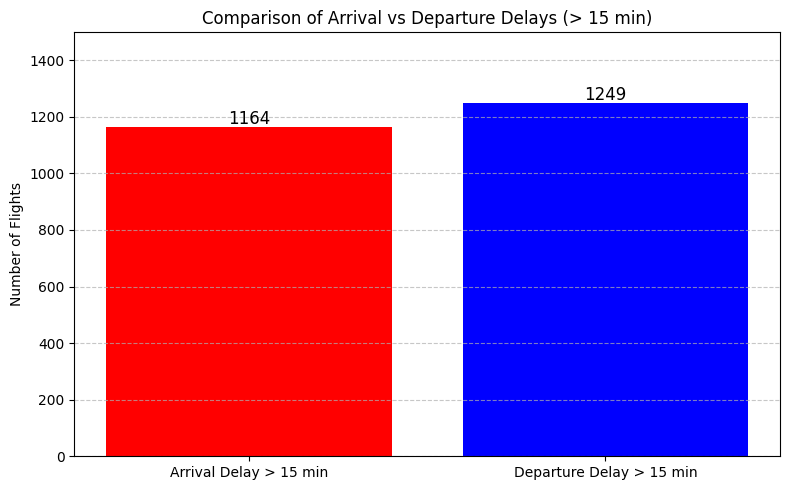

In [ ]:
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'blue'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             '%d' % int(height), ha='center', fontsize=12)

plt.title('Comparison of Arrival vs Departure Delays (> 15 min)')
plt.ylabel('Number of Flights')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Above graph shows the count of Arrival Delay > 15mins and Departure Delay > 15mins. 1164 flights got delayed while arriving and 1249 flights are delayed while departure.

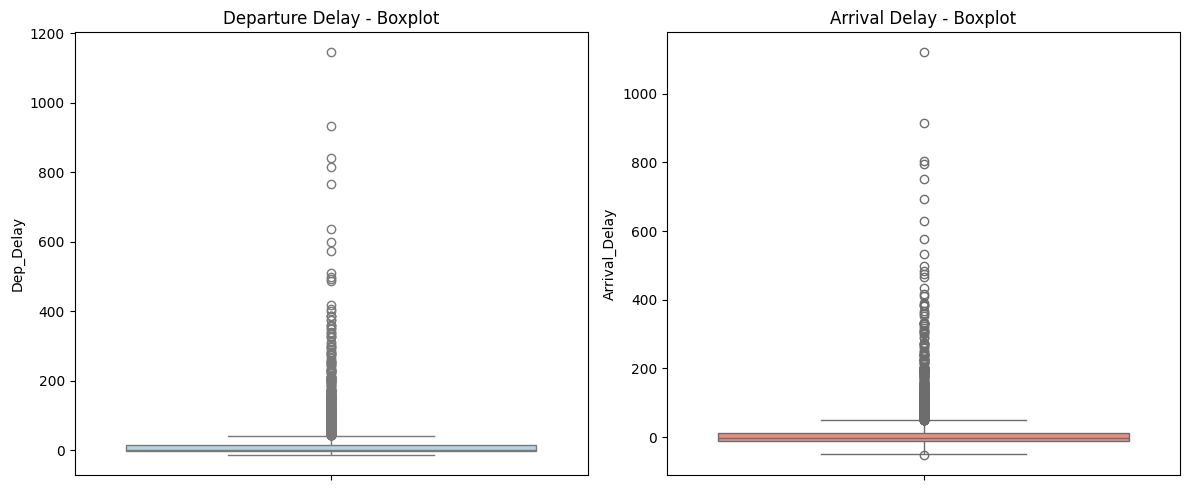

In [ ]:
# Plot box plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Dep_Delay'], color='lightblue')
plt.title('Departure Delay - Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Arrival_Delay'], color='salmon')
plt.title('Arrival Delay - Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
# Function to detect and count outliers using IQR
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Count of outliers in Departure and Arrival Delay
dep_outlier_count = count_outliers_iqr(df, 'Dep_Delay')
arr_outlier_count = count_outliers_iqr(df, 'Arrival_Delay')

print(f"Departure Delay Outliers: {dep_outlier_count}")
print(f"Arrival Delay Outliers: {arr_outlier_count}")

Departure Delay Outliers: 617
Arrival Delay Outliers: 515


There are 617 outliers in Departure Delay and 515 arrival Delay.

In [ ]:
# Function to get outliers based on IQR
def get_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Get outliers
arrival_outliers = get_outliers_iqr(df, 'Arrival_Delay')
departure_outliers = get_outliers_iqr(df, 'Dep_Delay')

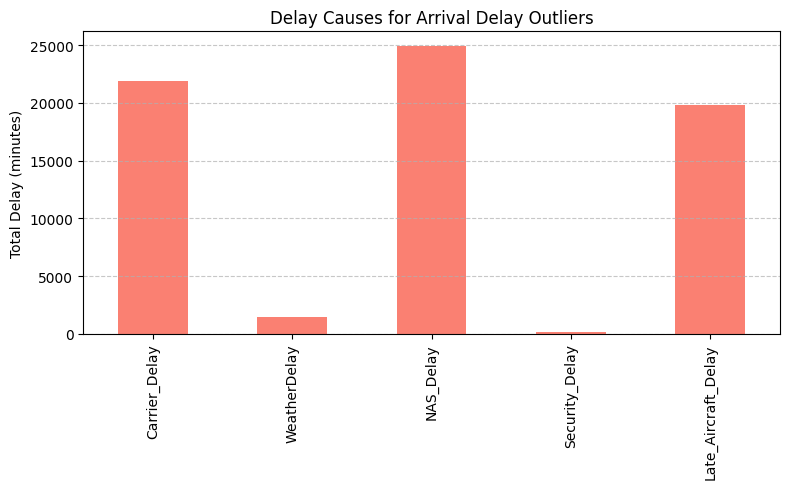

In [ ]:
# List of delay causes
causes = ['Carrier_Delay', 'WeatherDelay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']

# Sum of causes for arrival delay outliers
arr_cause_sum = arrival_outliers[causes].sum()

# Plot
plt.figure(figsize=(8, 5))
arr_cause_sum.plot(kind='bar', color='salmon')
plt.title('Delay Causes for Arrival Delay Outliers')
plt.ylabel('Total Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Above graph represents the various reason for extreme arrival delay in time(For outliers). Extreme arrival delay is happening because of NAS_Delay.

In [ ]:
import plotly.express as px

# List of delay causes
causes = ['Carrier_Delay', 'WeatherDelay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']

# Prepare data
arr_cause_sum = arrival_outliers[causes].sum().reset_index()
arr_cause_sum.columns = ['Cause', 'Total_Delay_Minutes']

# Create interactive bar plot
fig = px.bar(
    arr_cause_sum,
    x='Cause',
    y='Total_Delay_Minutes',
    title='Delay Causes for Arrival Delay Outliers',
    labels={
        'Cause': 'Cause of Delay',
        'Total_Delay_Minutes': 'Total Delay (minutes)'
    },
    color_discrete_sequence=['salmon'],
    hover_data={'Total_Delay_Minutes': ':.2f'}  # Tooltip with 2 decimal places
)

# Add grid lines similar to plt.grid(axis='y')
fig.update_layout(
    template='plotly_white',
    yaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=1, zeroline=False)
)

# Show plot
fig.show()


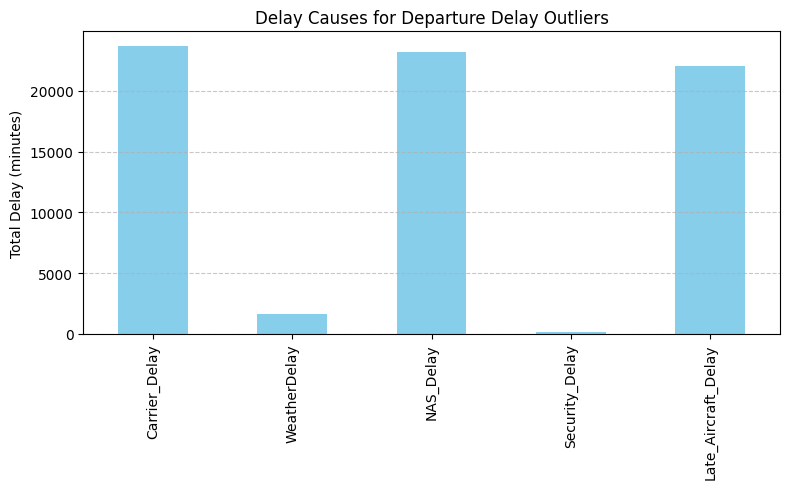

In [ ]:
# Sum of causes for departure delay outliers
dep_cause_sum = departure_outliers[causes].sum()

# Plot
plt.figure(figsize=(8, 5))
dep_cause_sum.plot(kind='bar', color='skyblue')
plt.title('Delay Causes for Departure Delay Outliers')
plt.ylabel('Total Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Above graph represents the various reason for extreme departure delay by time(For outliers). Extreme departure delay is happening because of Carrier_Delay,  NAS_Delay, and Late_Aircraft_Delay.

In [ ]:
import plotly.express as px

# List of delay causes
causes = ['Carrier_Delay', 'WeatherDelay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']

# Prepare data
dep_cause_sum = departure_outliers[causes].sum().reset_index()
dep_cause_sum.columns = ['Cause', 'Total_Delay_Minutes']

# Create interactive bar plot
fig = px.bar(
    dep_cause_sum,
    x='Cause',
    y='Total_Delay_Minutes',
    title='Delay Causes for Departure Delay Outliers',
    labels={
        'Cause': 'Cause of Delay',
        'Total_Delay_Minutes': 'Total Delay (minutes)'
    },
    color_discrete_sequence=['skyblue'],
    hover_data={'Total_Delay_Minutes': ':.2f'}  # Tooltip with 2 decimal points
)

# Add grid lines similar to matplotlib
fig.update_layout(
    template='plotly_white',
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1,
        zeroline=False
    )
)

# Show plot
fig.show()

In [ ]:
# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to Origin_Airport
df['Origin_Airport'] = le.fit_transform(df['Origin_Airport'])

# Optional: Check encoded values
print(df[['Origin_Airport']].head())

   Origin_Airport
0               5
1              15
2               0
3              15
4               4


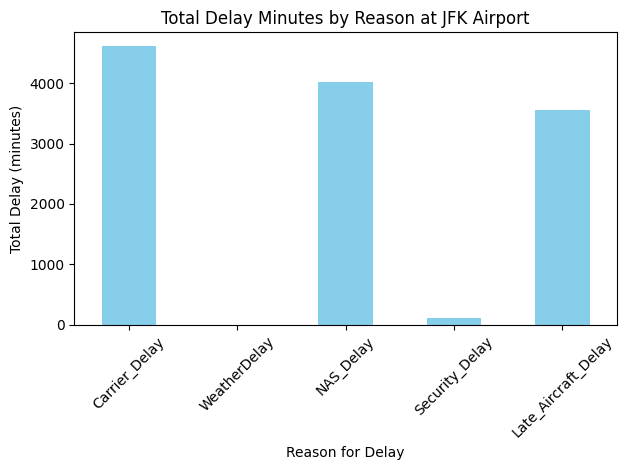

In [ ]:
import matplotlib.pyplot as plt

# Filter data for JFK
jfk_df = df[df['Origin_Airport'] == 'JFK']

# Sum up each delay reason (in minutes)
delay_reasons = ['Carrier_Delay', 'WeatherDelay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']
delay_totals = jfk_df[delay_reasons].sum()

# Plotting
delay_totals.plot(kind='bar', color='skyblue', title='Total Delay Minutes by Reason at JFK Airport')
plt.ylabel("Total Delay (minutes)")
plt.xlabel("Reason for Delay")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Filter data for JFK
jfk_df = df[df['Origin_Airport'] == 'JFK']

# Delay reasons
delay_reasons = ['Carrier_Delay', 'WeatherDelay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']

# Prepare data
delay_totals = jfk_df[delay_reasons].sum().reset_index()
delay_totals.columns = ['Reason', 'Total_Delay_Minutes']

# Create interactive bar plot
fig = px.bar(
    delay_totals,
    x='Reason',
    y='Total_Delay_Minutes',
    title='Total Delay Minutes by Reason at JFK Airport',
    labels={
        'Reason': 'Reason for Delay',
        'Total_Delay_Minutes': 'Total Delay (minutes)'
    },
    color_discrete_sequence=['skyblue'],
    hover_data={'Total_Delay_Minutes': ':.2f'}  # Tooltip with 2 decimal places
)

# Layout adjustments
fig.update_layout(
    template='plotly_white',
    xaxis_tickangle=-45
)

# Show plot
fig.show()

**Key Insights From EDA:**
1. NAS_Delay is the major reason for flight delay.
2. Arrival_Delay > 15 min is 1164 and Dep_Delay > 15 mins is 1249.
3. Extreme depature delay is happening because of Carrier delay and NAS_Delay.
4. ATL is the busiest airport.
5. There are 617 outliers in Departure Delay and 515 outliers in Arrival Delay.
6. ATL is the airport where most of flights are getting delayed so people can avoid traveling from that airport.
7. Eventhough JFK is not much busiest airport, flights are getting delayed more. So there may be some reason for flight getting delayed in that airport.
8. Major reason for delay in JFk airport is Carrier_Delay, next is NAS_Delay and Late_Aircraft_Delay. So Corresponding authority has to take care of it.
9. Major flight delay is happening between 04:00AM to 05:00AM.   
10. Major Distribution of Flight Arrival and Departure Delay is happening between -50 mins to +50 mins. The Departure Delay time has been calculated using two features which is **Scheduled_Departure - Departure_Time.**

**Conclusion:**\
This exploratory data analysis of U.S. flight delays uncovered key patterns and causes of disruptions in domestic air travel. While most flights are on time, delays are more common during late hours. Late aircraft and carrier-related issues are the main contributors to total delay minutes, with weather and security playing smaller roles.

Busy airports like ATL and MSP see more delays, possibly due to congestion. Grouping flights by time of day helped identify peak delay periods, and correlation analysis confirmed that departure delays often lead to arrival delays.

Overall, this analysis highlights how data can reveal operational inefficiencies and support future work in delay prediction and optimization.